In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-dataset/WineQT.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Data Preparation

In [3]:
import pandas as pd
df = pd.read_csv("/kaggle/input/wine-quality-dataset/WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [4]:
# Delete useless feature("Id")
df.drop("Id", axis = 1, inplace = True)

# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: xlabel='quality'>

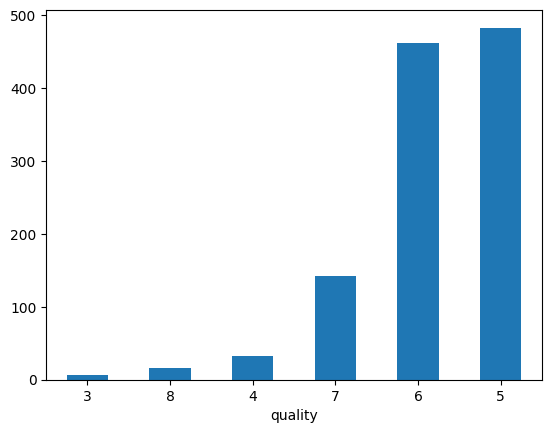

In [7]:
# How many values in target("quality")?
df["quality"].value_counts(ascending = True).plot.bar(rot = 0)

### In general, quality scores are most distributed between 5 ~ 6.
### I will compare wine quality of highest score(8) & lowest score(3).

In [8]:
# Recollect this dataset with quality = 3 & 8
df_new = df[(df["quality"] == 3) | (df["quality"] == 8)]
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
190,7.9,0.350,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.80,8
197,10.3,0.320,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.60,8
271,5.6,0.850,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.90,8
310,12.6,0.310,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.80,8
321,11.3,0.620,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.40,8
324,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
340,9.4,0.300,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.70,8
349,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.00,8
352,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.00,8
368,10.4,0.610,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3


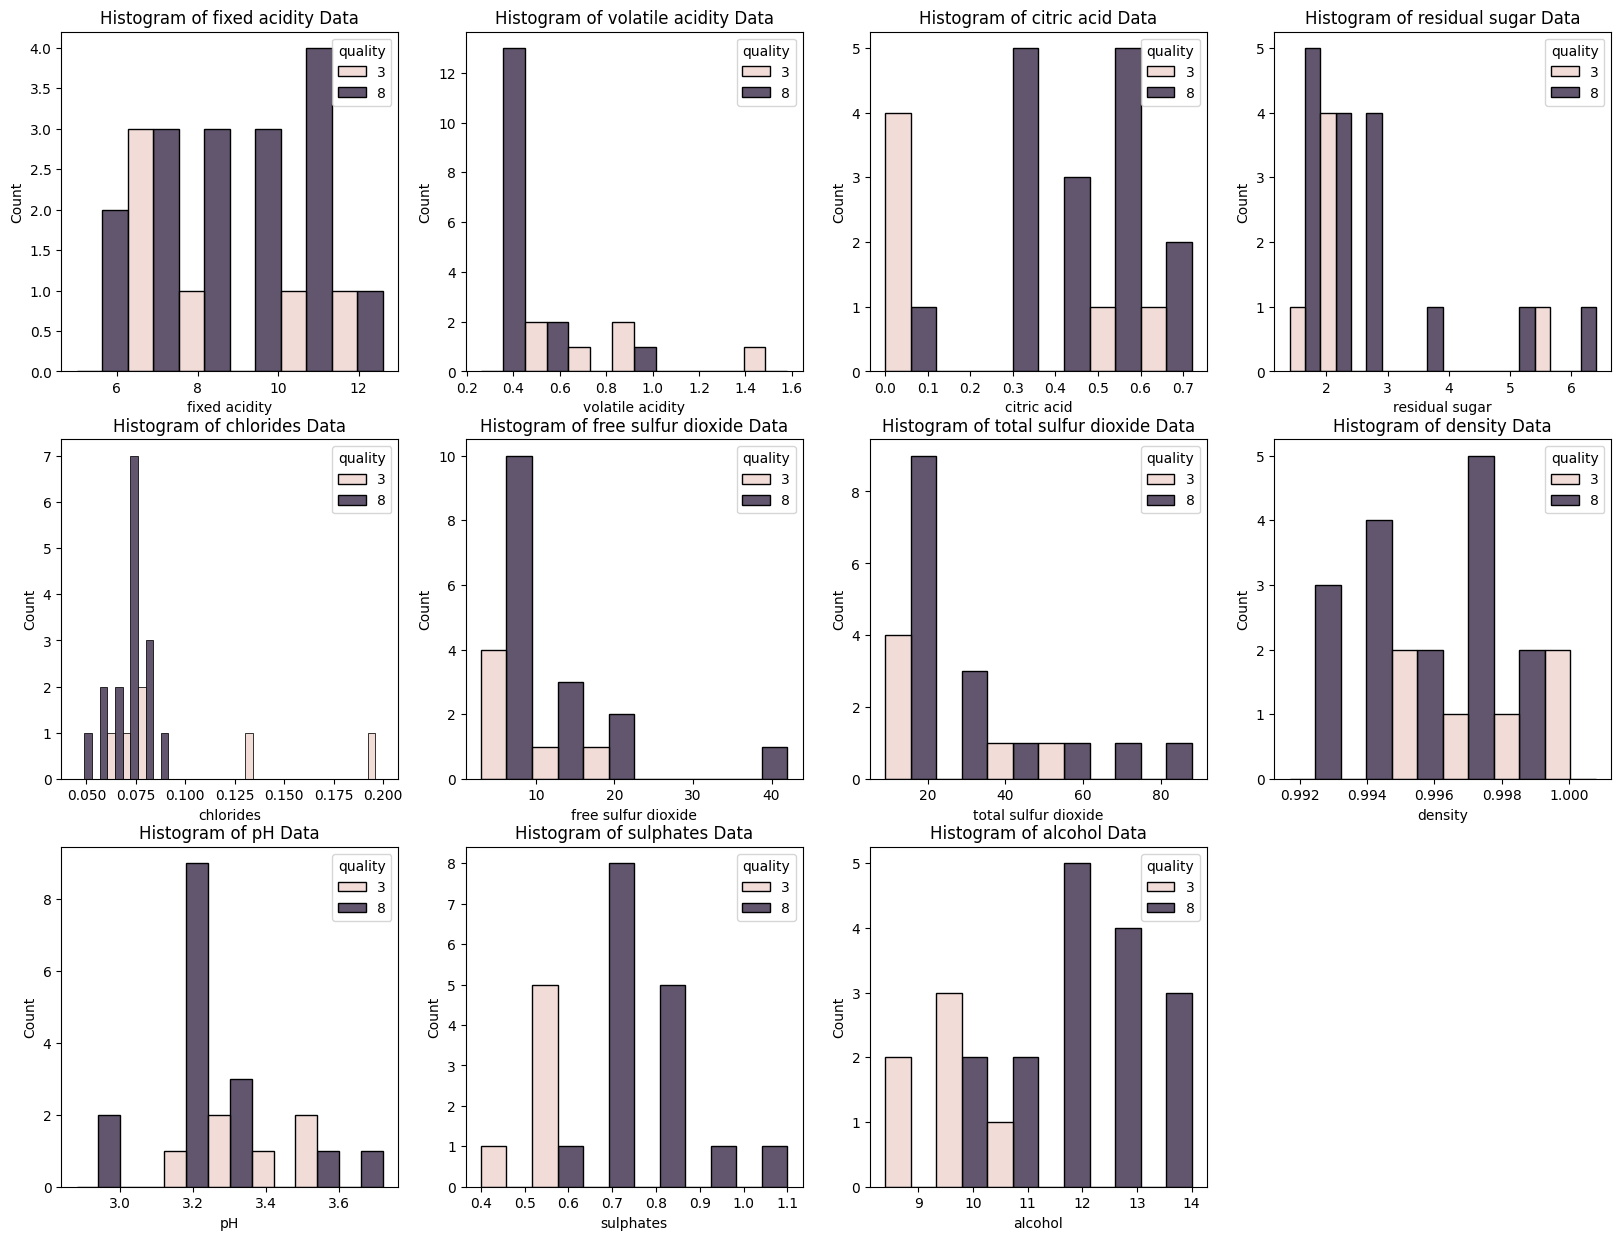

In [9]:
# Histogram of df_new
plt.figure(figsize = (20, 15))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 4, i)
    sns.histplot(x = df_new[col], hue = df_new["quality"], multiple = "dodge")
    plt.title(f"Histogram of {col} Data")
    plt.xticks(rotation = 0)
    plt.plot()

### For high qulaity wine, it shows some trends.
### - Most of them have low volatile acidity/cholrides/free sulfur dioxide/total sulfur dioxide.
### - And they have high citric acid/sulphates/alchohol.
### Especially, high index of sulphates & alcohol shows high quality.

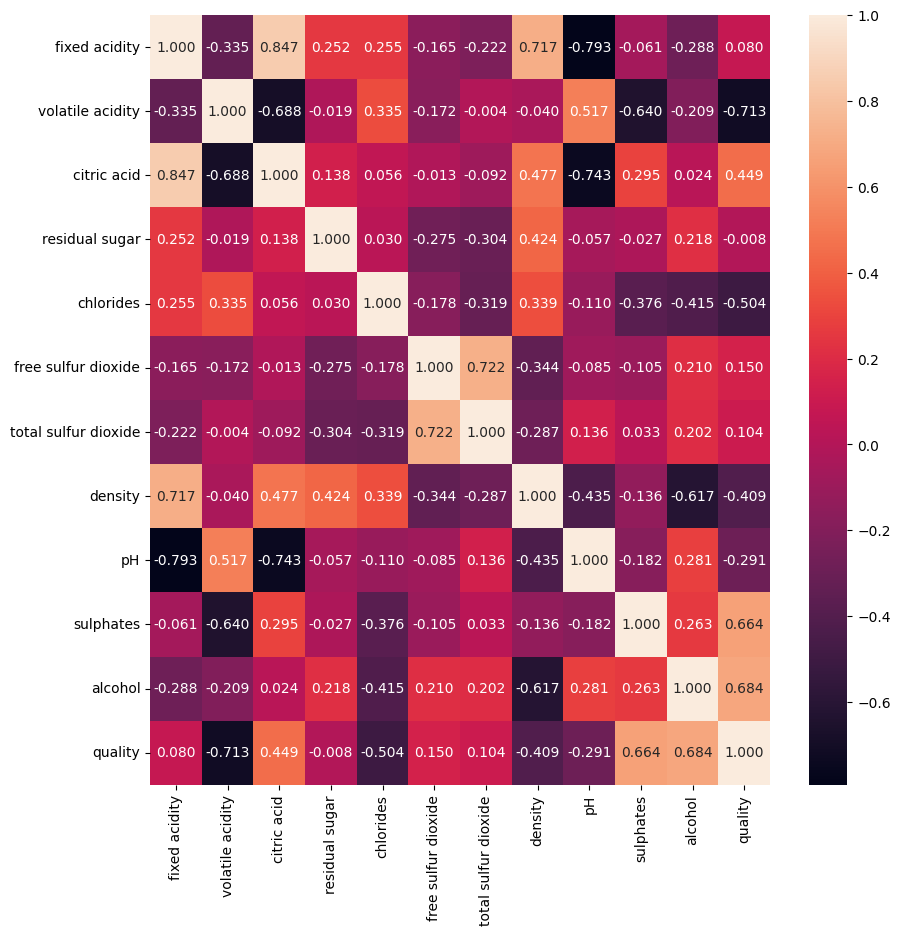

In [10]:
# Correlation of df_new
plt.figure(figsize = (10, 10))
df_new_corr = df_new.corr()
sns.heatmap(df_new_corr, fmt = ".3f", annot = True)
plt.show()

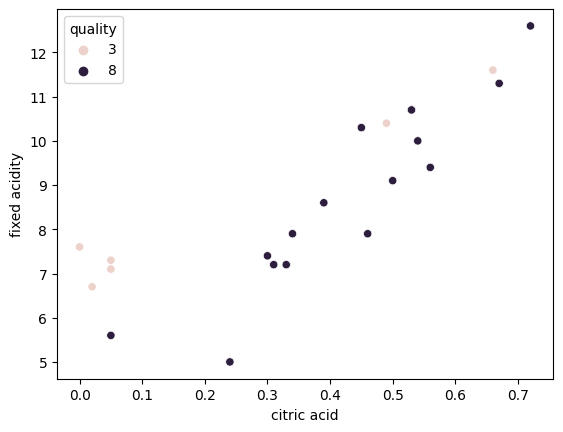

In [11]:
# Top correlation of df_new
sns.scatterplot(x = df_new["citric acid"], y = df_new["fixed acidity"], hue = df_new["quality"])
plt.show()

# Prepare Machine Learning Model - Regression

In [12]:
# split dataset(df) with train & test
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
# Standardization of X_train & X_test
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build ML Model - XGBRegressor

<Axes: >

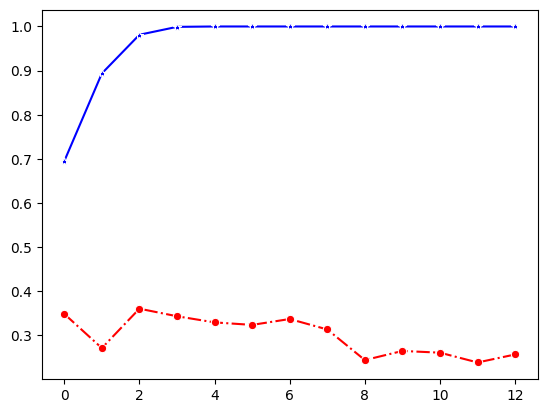

In [14]:
# Check train & test score if XGBRegressor
train_scores = []
test_scores = []
for i in range(2, 15):
    xgbr = XGBRegressor(n_estimators = i*20, max_depth = i+1, max_features = 0.2*i)
    xgbr.fit(X_train, y_train)
    train_scores.append(xgbr.score(X_train, y_train))
    test_scores.append(xgbr.score(X_test, y_test))
sns.lineplot(train_scores, marker = "*", color = "b", linestyle = "-")
sns.lineplot(test_scores, marker = "o", color = 'r', linestyle = "-.")

In [15]:
# Select i = 4 for best model
xgbr = XGBRegressor(n_estimators = 80, max_depth = 5, max_features = 0.8)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_features=0.8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=80,
             n_jobs=None, num_parallel_tree=None, ...)

In [16]:
# Predict XGBRegressor model
y_xgbr = xgbr.predict(X_test).round()

# MEan Absolute Error between y_xgbr & y_test
print("MAE Score :", mean_absolute_error(y_xgbr, y_test))

MAE Score : 0.3930131004366812
